In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [103]:
reviews = pd.read_csv("./ecommerce_reviews_english.csv")

In [104]:
reviews.head(5)

,review_id,order_id,customer_id,product_id,rating,review_text,review_date,helpful_votes,status,review_language
0,1,157654,60352,798,1,"For a Beauty product, this is severely lacking...",2024-07-01 18:38:40,NaN,approved,English
1,2,157654,60352,2232,1,I cannot recommend this Umbrella Aftershave Pl...,2024-06-23 18:38:40,0.0,approved,English
2,3,157654,60352,3530,3,Moderately satisfied.,2024-07-06 18:38:40,3.0,approved,English
3,4,337752,70587,3374,3,The Acme Smartwatch Lite handles standard Elec...,2023-05-27 19:19:52,1.0,approved,English
4,5,337752,70587,314,4,Outstanding quality! I've been using the Stark...,2023-04-27 19:19:52,0.0,approved,English


In [105]:
reviews.isna().sum()

review_id             0
order_id              0
customer_id           0
product_id            0
rating                0
review_text        8769
review_date           0
helpful_votes      3871
status                0
review_language       0
dtype: int64

In [106]:
reviews.duplicated().sum()

0

In [107]:
reviews = reviews[~reviews['review_text'].isna()]
reviews.isna().sum()

review_id             0
order_id              0
customer_id           0
product_id            0
rating                0
review_text           0
review_date           0
helpful_votes      3601
status                0
review_language       0
dtype: int64

In [108]:
reviews['review_language'].unique()

array(['English'], dtype=object)

In [109]:
reviews.drop(columns=['review_language'] , inplace=True)

In [110]:
reviews['status'].unique()

array(['approved', 'pending', 'deleted', 'rejected'], dtype=object)

In [111]:
reviews.columns

Index(['review_id', 'order_id', 'customer_id', 'product_id', 'rating',
       'review_text', 'review_date', 'helpful_votes', 'status'],
      dtype='object')

In [112]:
reviews.head(5)

,review_id,order_id,customer_id,product_id,rating,review_text,review_date,helpful_votes,status
0,1,157654,60352,798,1,"For a Beauty product, this is severely lacking...",2024-07-01 18:38:40,NaN,approved
1,2,157654,60352,2232,1,I cannot recommend this Umbrella Aftershave Pl...,2024-06-23 18:38:40,0.0,approved
2,3,157654,60352,3530,3,Moderately satisfied.,2024-07-06 18:38:40,3.0,approved
3,4,337752,70587,3374,3,The Acme Smartwatch Lite handles standard Elec...,2023-05-27 19:19:52,1.0,approved
4,5,337752,70587,314,4,Outstanding quality! I've been using the Stark...,2023-04-27 19:19:52,0.0,approved


In [113]:
sentence_size = [len(review_text) for review_text in reviews['review_text']]
max_sentence = np.max(sentence_size)
min_sentence = np.min(sentence_size)
mean_sentence = np.average(sentence_size)
percentile_90_sentence = np.percentile(sentence_size , 90)

In [114]:
print(f"max_sentence => {max_sentence} \n min_sentence => {min_sentence} \n mean_sentence => {mean_sentence} \n percentile_90_sentence => {percentile_90_sentence}")

max_sentence => 156 
 min_sentence => 15 
 mean_sentence => 80.16867299602613 
 percentile_90_sentence => 127.0


Text Preprossing

In [115]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
stop_words = set(stopwords.words('english'))
lemitizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
def cleaning_texts(text):
    text = re.sub(r"[^ A-Za-z0-9.!?']", "", text)
    text = re.sub(r" +", " ", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)


    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = ' '.join(word for word in text.split() if word not in stop_words)
    # lemitized_text = lemitizer.lemmatize(word for word in text.split())

    lemitized_text = ' '.join(lemitizer.lemmatize(word) for word in text.split())
    return lemitized_text


In [117]:
reviews['review_text_cleaned'] = reviews['review_text'].apply(cleaning_texts)

In [118]:
reviews.head(5)

,review_id,order_id,customer_id,product_id,rating,review_text,review_date,helpful_votes,status,review_text_cleaned
0,1,157654,60352,798,1,"For a Beauty product, this is severely lacking...",2024-07-01 18:38:40,NaN,approved,beauty product severely lacking customer suppo...
1,2,157654,60352,2232,1,I cannot recommend this Umbrella Aftershave Pl...,2024-06-23 18:38:40,0.0,approved,cannot recommend umbrella aftershave plus arri...
2,3,157654,60352,3530,3,Moderately satisfied.,2024-07-06 18:38:40,3.0,approved,moderately satisfied
3,4,337752,70587,3374,3,The Acme Smartwatch Lite handles standard Elec...,2023-05-27 19:19:52,1.0,approved,acme smartwatch lite handle standard electroni...
4,5,337752,70587,314,4,Outstanding quality! I've been using the Stark...,2023-04-27 19:19:52,0.0,approved,outstanding quality ive using stark lipstick m...


In [119]:
sentence_size = [len(review_text) for review_text in reviews['review_text_cleaned']]
print(f"max sentence len : {np.max(sentence_size)}")
print(f"aveg sentence len : {np.mean(sentence_size)}")
print(f"90 percentile len : {np.percentile(sentence_size , 90)}")
print(f"95 percentile len : {np.percentile(sentence_size , 95)}")

max sentence len : 131
aveg sentence len : 61.07729079028316
90 percentile len : 96.0
95 percentile len : 103.0


<Axes: ylabel='Count'>

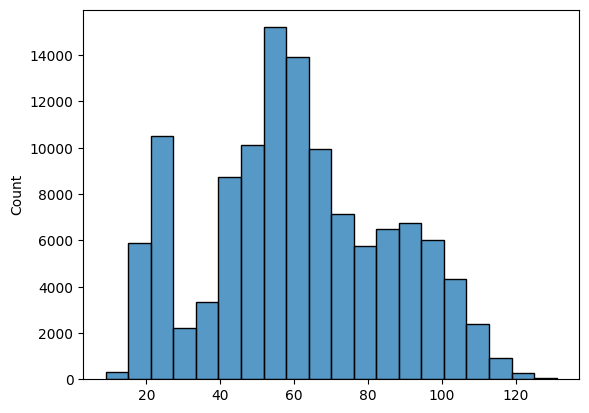

In [120]:

sns.histplot(sentence_size , bins=20)

- Sentement Analysis : Roberta Pretrained Model

In [121]:
from transformers import AutoTokenizer , AutoModelForSequenceClassification
from scipy.special import softmax

In [122]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokienzier = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Enode The Text Using tokenzier

In [ ]:
dic = {}

def polarity_scores_roberta( index , text):
    try :
            encoded_text = tokienzier(text ,  return_tensors='pt')
            outpot = model(**encoded_text)

            scores = outpot[0][0].detach().numpy()

            scores = softmax(scores)

            scores_dict = {
            'roberta_neg' : scores[0],
            'roberta_neu' : scores[1],
            'roberta_pos' : scores[2]
            }

            dic[index] = scores_dict

    except RuntimeError :
          dic[index] = None

# reviews.apply(lambda x: polarity_scores_roberta(str(x['review_id']), str(x['review_text_cleaned'])), axis=1)

Batch Prossing running on gpu for faster computuon

In [125]:
import torch
from tqdm import tqdm

# make it to run on gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

batch_size = 128 

texts = reviews['review_text_cleaned'].astype(str).tolist()
ids = reviews['review_id'].astype(str).tolist()

neg_list, neu_list, pos_list = [], [], []

for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
    batch_texts = texts[i:i+batch_size]
    
    encoded = tokienzier(batch_texts, return_tensors='pt', padding=True, truncation=True).to(device)

    with torch.no_grad():
        output = model(**encoded)

    scores = output.logits.detach().cpu().numpy()
    probs = softmax(scores, axis=1)

    neg_list.extend(probs[:, 0])
    neu_list.extend(probs[:, 1])
    pos_list.extend(probs[:, 2])

reviews['roberta_neg'] = neg_list
reviews['roberta_neu'] = neu_list
reviews['roberta_pos'] = pos_list

Processing batches: 100%|██████████| 940/940 [02:14<00:00,  7.01it/s]


In [126]:
reviews.head()

,review_id,order_id,customer_id,product_id,rating,review_text,review_date,helpful_votes,status,review_text_cleaned,roberta_neg,roberta_neu,roberta_pos
0,1,157654,60352,798,1,"For a Beauty product, this is severely lacking...",2024-07-01 18:38:40,NaN,approved,beauty product severely lacking customer suppo...,0.961563,0.035964,0.002473
1,2,157654,60352,2232,1,I cannot recommend this Umbrella Aftershave Pl...,2024-06-23 18:38:40,0.0,approved,cannot recommend umbrella aftershave plus arri...,0.923639,0.071934,0.004427
2,3,157654,60352,3530,3,Moderately satisfied.,2024-07-06 18:38:40,3.0,approved,moderately satisfied,0.107738,0.621467,0.270795
3,4,337752,70587,3374,3,The Acme Smartwatch Lite handles standard Elec...,2023-05-27 19:19:52,1.0,approved,acme smartwatch lite handle standard electroni...,0.007453,0.505454,0.487093
4,5,337752,70587,314,4,Outstanding quality! I've been using the Stark...,2023-04-27 19:19:52,0.0,approved,outstanding quality ive using stark lipstick m...,0.015706,0.189057,0.795238


In [134]:
# Let's Take a Copy Of reviews
reviews_copy = reviews[['review_id' , 'rating' , 'helpful_votes' , 'status',"review_text_cleaned",	"roberta_neg",	"roberta_neu",	"roberta_pos" ]].copy()
reviews_copy.head(5)

,review_id,rating,helpful_votes,status,review_text_cleaned,roberta_neg,roberta_neu,roberta_pos
0,1,1,NaN,approved,beauty product severely lacking customer suppo...,0.961563,0.035964,0.002473
1,2,1,0.0,approved,cannot recommend umbrella aftershave plus arri...,0.923639,0.071934,0.004427
2,3,3,3.0,approved,moderately satisfied,0.107738,0.621467,0.270795
3,4,3,1.0,approved,acme smartwatch lite handle standard electroni...,0.007453,0.505454,0.487093
4,5,4,0.0,approved,outstanding quality ive using stark lipstick m...,0.015706,0.189057,0.795238


In [138]:
# let's fill the nulls for helpful_votes with 0
reviews_copy = reviews_copy.fillna(0)

C:\Users\omary\AppData\Local\Temp\ipykernel_30452\2223915112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=number_of_rating , x="rating" , y="count" , palette="dark")


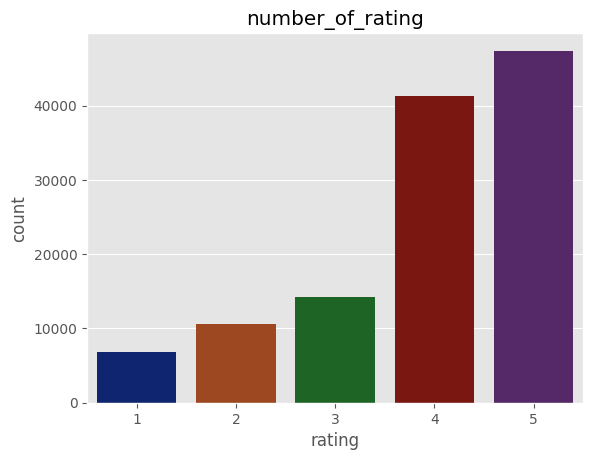

In [ ]:
number_of_rating = reviews.groupby('rating')['review_id'].count().reset_index(name="count")
plt.title("Top Rating")
sns.barplot(data=number_of_rating , x="rating" , y="count" , palette="dark")
plt.show()

C:\Users\omary\AppData\Local\Temp\ipykernel_30452\2124337209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews_copy, x="rating", y="roberta_pos", palette="dark")
C:\Users\omary\AppData\Local\Temp\ipykernel_30452\2124337209.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews_copy, x="rating", y="roberta_neu", palette="pastel")
C:\Users\omary\AppData\Local\Temp\ipykernel_30452\2124337209.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reviews_copy, x="rating", y="roberta_neg", palette="Reds")


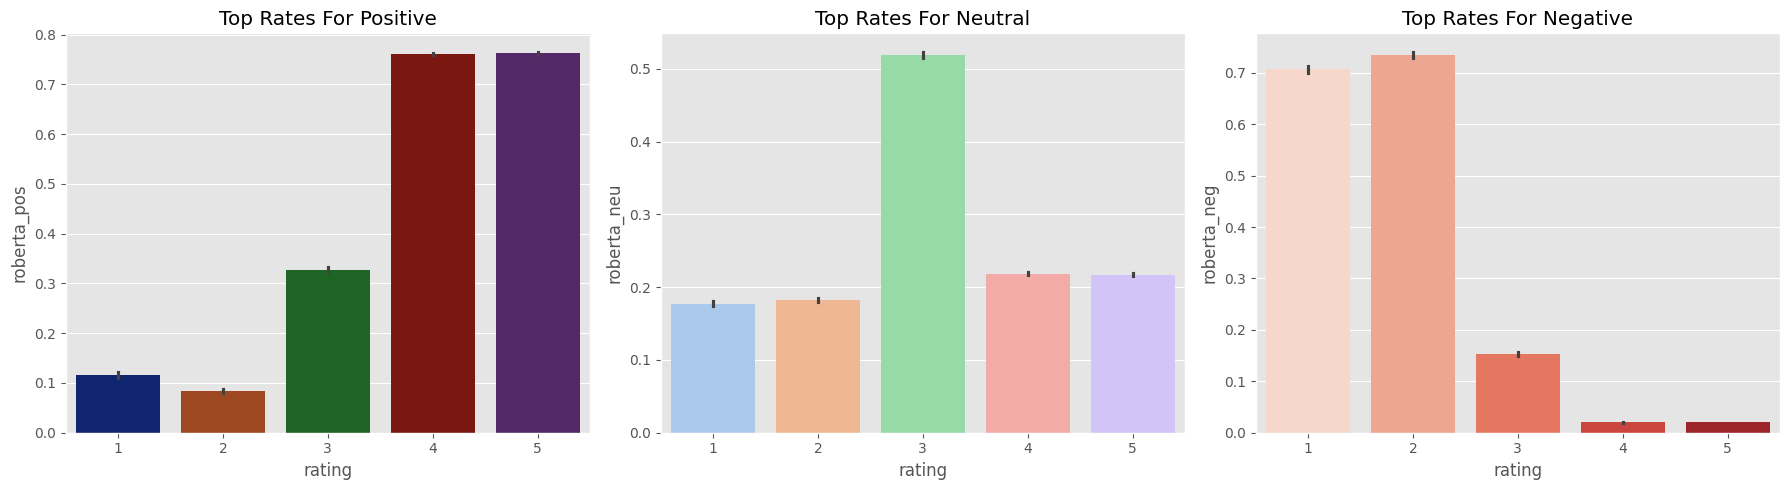

In [ ]:
plt.figure(figsize=(18, 5)) 

plt.subplot(1, 3, 1) 
plt.title("Top Rates For Positive")
sns.barplot(data=reviews_copy, x="rating", y="roberta_pos", palette="dark")

plt.subplot(1, 3, 2)
plt.title("Top Rates For Neutral")
sns.barplot(data=reviews_copy, x="rating", y="roberta_neu", palette="pastel")


plt.subplot(1, 3, 3)
plt.title("Top Rates For Negative")
sns.barplot(data=reviews_copy, x="rating", y="roberta_neg", palette="Reds")

plt.tight_layout() 
plt.show()


classify_sentiment if it's Positive , Negative Or Netural 

In [151]:
def classify_sentiment(row):
    scores = [row['roberta_neg'], row['roberta_neu'], row['roberta_pos']]
    max_index = np.argmax(scores)  # هترجع 0 أو 1 أو 2
    if max_index == 0:
        return 'negative'
    elif max_index == 1:
        return 'neutral'
    else:
        return 'positive'

reviews_copy['sentiment'] = reviews_copy.apply(classify_sentiment, axis=1)


In [152]:
sentiment_grouped_by = reviews_copy.groupby('sentiment')['sentiment'].count().reset_index(name="total")
sentiment_grouped_by

,sentiment,total
0,negative,16517
1,neutral,23596
2,positive,80173


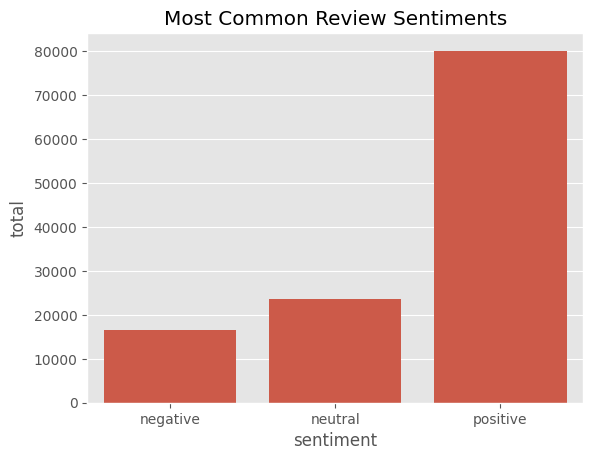

In [155]:
plt.title("Most Common Review Sentiments")
sns.barplot(data=sentiment_grouped_by , x='sentiment' , y='total')
plt.show()


In [ ]:
# نقدر بقي من ده نعرف ايه اكثر المنتجات ذات تثيم عالي وايه اقلهم تقيم وليه وهكذا 